# Tarefa 3 - Francisco José Santos de Oliveira - 119150156

> Trabalhei na resolução de algumas questões com Carlos Bravo e Gabriele Jandres.

## Questão 1

Primeiro, transformamos a raiz de 10 em uma função e estabelecemos o 'a' e o 'b' do intervalo.

In [1]:
f(x) = x^2 - 10
a = 0
b = 20

20

Em seguida, implementamos a função de bissecção trabalhada em aula, fazendo uma pequena modificação: ao final do código, solicitamos o retorno da varíavel
'iterações'. Isso retornará a quantidade de passos.

In [3]:
function bissecao(f,a,b,tamanho_final_do_intervalo) 
#especificação: dado a e b tal que f(a) e f(b) tem sinais opostos (obrigação do usuário)
#retorna x_final tal que |x_final - x_c| <= tamanho_final_do_intervalo/2 com f(x_c)=0 (nossa promessa)
    
    if é_raiz(f,a)
        return a
    end
    if é_raiz(f,b)
        return b
    end
    if !(tem_sinais_opostos(f,a,b))
        return "Não tem sinais opostos"
    end
    
    iterações = floor(log2((b-a)/tamanho_final_do_intervalo))+1
    
    for i=1:iterações
        m=média(a,b)
        if é_raiz(f,m)
            return m
        end
        
        if tem_sinais_opostos(f,a,m)
            b=m
        else
            a=m
        end
    end
    
    print("passos: ")
    print(iterações)
    x_final=média(a,b)
    return x_final
end

bissecao (generic function with 1 method)

In [4]:
function tem_sinais_opostos(f,a,b) #função recebe f(a) e f(b) não nulos
    return f(a)*f(b) < 0
end

tem_sinais_opostos (generic function with 1 method)

In [5]:
function é_raiz(f,a)
    return f(a)==0
end

é_raiz (generic function with 1 method)

In [6]:
function média(x,y)
    return (x+y)/2
end

média (generic function with 1 method)

Agora, aplicamos os nossos valores na função criada e encontramos, respectivamente, o valor aproximado da raiz de 10 e a quantidade de passos feita.

OBS: Como será necessário utilizar distância final de intervalo em outra questão, eu irei adaptar o parâmetro para erro diretamente da chamada, multiplicando a distância por dois para que isso passe a ser verdade.

In [236]:
bissecao(f, a, b, 2*1e-8)

passos: 30.0

3.162277666851878

Portanto, o valor para a raiz de 10 encontrado foi 3.162277666851878 e a quantidade de passos necessários foi 30.

## Questão 2

Vamos primeiro implementar uma função para o Método de Newton:

In [2]:
function Newton(f, fd, x)
    #entradas: função, primeira derivada e x
    
    #criamos um limite de passos para que o algoritmo não fique rodando infinitamente
    passos, limite_passos = 0, 1000
    tolerância = 1e-14
    
    #loop para aproximação do x
    while(abs(f(x))>tolerância) && passos < limite_passos
        
        #
        x = x - f(x) / fd(x)
        passos += 1
    end
    
    #tratamento de erro para caso o limite de passos tenha sido excedido
    if(passos > limite_passos)
        error("número de passos excedido sem convergência bem sucedida.")
    end
    
    #retorno do valor aproximado de x
    x
end

Newton (generic function with 1 method)

Agora que temos funções para o Método da Bissecção e para o Método de Newton, criamos uma que englobe ambas para o interesse do enunciado.

In [9]:
function questão2(p, dp)
    if !(tem_sinais_opostos(p,-100,100))
        return "Não tem sinais trocados"
    end
    
    #bissecção sendo feita para diminuir o intervalo para 10^-2
    x = bissecao(p, -100, 100, 0.01)
    
    #aplicação do método de newton para encontrar uma das raízes
    raiz = Newton(p, dp, x)
    
    raiz
end

questão2 (generic function with 1 method)

Criamos um polinômio de grau 5 para ser testado:

In [237]:
g(x) = x^5 + 2x^3 + 10x + 4
gd(x) = 5x^4 + 6x^2 + 10

gd (generic function with 1 method)

In [55]:
using Plots
gr(size=(600,400))

Plots.GRBackend()

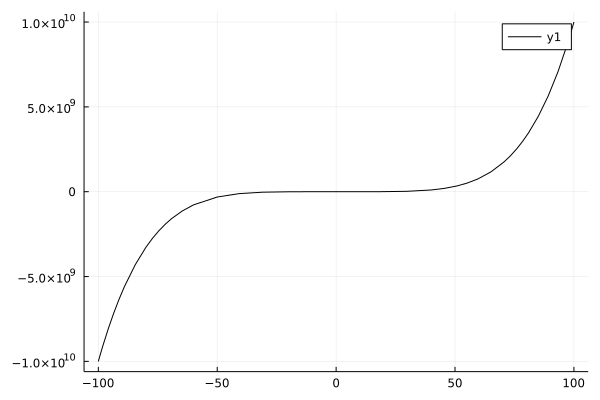

In [11]:
plot(g, -100, 100, c=:black)

Observando o gráfico, já sabemos que a função não pode emitir mensagem de erro e deve seguir com os dois métodos normalmente.

In [13]:
questão2(g,gd)

passos: 15.0

-0.3874901924124323

Portanto, o valor encontrado para uma das raízes desse polinômio é -0.3874901924124323.

# Questão 3 - Método Escolhido: Bissecção

Primeiro, transformamos ln(3) em uma função.

OBS: Esse símbolo pequeno é euler

In [16]:
h(x) = (ℯ^x) - 3

h (generic function with 1 method)

Se sabemos calcular e^x para qualquer x, podemos estabelecer um bom intervalo para colocar nos parâmetros 'a' e 'b'.

Sabemos que e^1 = 2.7182818 (aproximadamente), portanto, x=1 pode ser o intervalo inferior.

Da mesma forma, sabemos que e^2 = 7.389056 (aproximadamente), logo, x=2 pode ser o intervalo superior.

Em sequência, aplicamos a bissecção e obtemos a nossa aproximação com intervalo menor que 10^-3.

In [18]:
bissecao(h, 1, 2, 1e-3)

passos: 10.0

1.09814453125

Portanto, o valor encontrado para o logaritmo natural de 3 é 1.09814453125.

## Questão 4

Utilizando os cossenos da tabela, sabemos 3 pontos da função cosseno. Traduzindo para o input da função(radianos), temos que:

>Cos(π/6) = sqrt(3)/2  
Cos(π/4) = sqrt(2)/2  
Cos(π/3) = 1/2

Com essas informações, conseguimos definir o vetor x e y para serem utilizado nas funções de interpolação

In [238]:
x = [π/6; π/4; π/3]
y = [sqrt(3)/2; sqrt(2)/2; 1/2]

3-element Vector{Float64}:
 0.8660254037844386
 0.7071067811865476
 0.5

Agora, implementamos a função de interpolação e de avaliar o polinômio, feitas em aula

In [23]:
using LinearAlgebra
function interpolação(x, y)
   
    #criar a matriz de Vondermonde
    V=[x.^0 x.^1 x.^2]
    #resolver o sistema linear Vc=y
    c=V\y
    
    return c #vetor de coeficientes
end

interpolação (generic function with 1 method)

In [141]:
function avaliar_um_polinomio(c,x)
    V=[x.^0 x.^1 x.^2]
    y=V*c
    return y
end

avaliar_um_polinomio (generic function with 1 method)

Agora, efetuamos a interpolação.

In [239]:
c = interpolação(x,y)

3-element Vector{Float64}:
  1.0392981732142506
 -0.14686140578658125
 -0.35153865113381094

Em seguida adicionamos 2pi/9 (40 graus em radiano) ao vetor de X para que possamos reverter o processo e receber o valor de y.

In [240]:
x = [π/6; π/4; π/3; (2π)/9]
y = avaliar_um_polinomio(c,x)

4-element Vector{Float64}:
 0.8660254037844385
 0.7071067811865475
 0.4999999999999999
 0.7654338952290286

Portanto, o valor encontrado para o cosseno de 40° é 0.7654338952290286.

## Questão 5

Utilizando as informações dadas no enunciado, temos:

>f(0) = 25  
f(60) = 30  
f(150) = 34

Onde x é a quantidade de minutos anteriores ao último momento registrado (17h30)

Colocamos os inputs na função x e os outputs na y e realizamos a interpolação para achar os coeficientes:

In [226]:
x = [0; 60; 150;]
y = [25; 30; 34;]
interpolação(x,y)

3-element Vector{Float64}:
 25.0
  0.09888888888888889
 -0.00025925925925925926

Então, f(x) = -0.00025925925925925926x^2 + 0.09888888888888889x + 25.0

Para viablizar o método da bissecção, iremos adaptar essa função para colocar o valor 37 como o 0.

>37 = -0.00025925925925925926x^2 + 0.09888888888888889x + 25.0  
0 = -0.00025925925925925926x^2 + 0.09888888888888889x - 12

In [11]:
f(x) = -0.00025925925925925926x^2 + 0.09888888888888889x + 25

f (generic function with 1 method)

Por fim, executamos o método da bissecção:

In [3]:
bissecao(f, 0, 1440, 1e-14)

LoadError: UndefVarError: bissecao not defined


(process:7444): GLib-GIO-WARNING **: 12:26:40.641: Unexpectedly, UWP app `60132torumyax.SimpleImageViewer_1.2.17.0_x86__s0dtgdfwgsbky' (AUMId `60132torumyax.SimpleImageViewer_s0dtgdfwgsbky!ImageViewer') supports 5 extensions but has no verbs


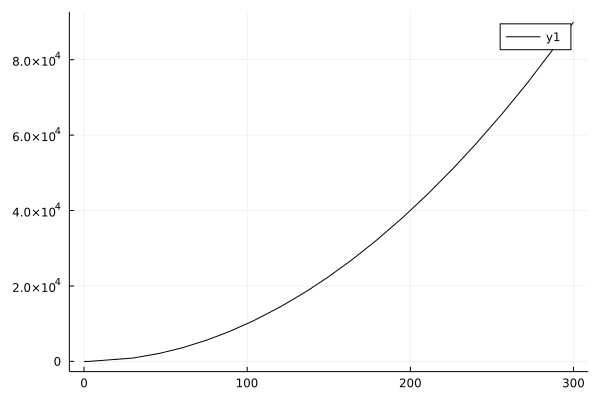

In [3]:
using Plots
gr(size=(600,400))
plot(f, 0, 300, c=:black)

Como é possível observar, a função que geramos pelo método de interpolação não passa por 37. Vejamos então nossa melhor estimativa.

Primeiro, encontramos o valor máximo da função gerada:

In [230]:
f(x) = -0.00025925925925925926x^2 + 0.09888888888888889x + 25
a = -0.00025925925925925926
b = 0.09888888888888889
c = 25
-((b)^2 -4(a*c))/(4*a)

34.429761904761904

Agora que sabemos o ponto máximo presente na função, conseguimos estimar um horário mais próximo do assassinato. 

34.429761904761904 = -0.00025925925925925926x^2 + 0.09888888888888889x + 25 

>0 = -0.00025925925925925926x^2 + 0.09888888888888889x -9.429761904761904

In [231]:
f(x) = -0.00025925925925925926x^2 + 0.09888888888888889x - 9.429761904761904

f (generic function with 1 method)

Agora, resolvemos a equação de segundo grau para achar x:

In [232]:
c = - 9.429761904761904
(-b+sqrt((b^2) - 4(a*c)))/(2*a)

190.71428571428572

Isso signifca que a temperatura de 34.429761904761904° aconteceu 190.71428571428572 minutos antes de agora 

(entenda agora como 17h30, o horário onde foi checada a temperatura pela última vez).

>190.71428571428572 = 3 horas, 10 minutos e 42 segundos.

Portanto, podemos ao menos concluir que o assassinato já havia ocorrido às 14h19m18s.

## Questão 6

Pelos dados fornecidos, sabemos que:

>A( 1, 2 ) = 800m  
A( 1, 4 ) = 400m  
A( 3, 2 ) = 600m  
A( 3, 4 ) = 500m

Utilizando o Método de Lagrange e trabalhando com todas as combinações possíveis, obtemos 4 grandes estruturas:

>((x - 3) * (y - 4))/((1 - 3) * (2 - 4)) = **((xy - 4x - 3y +12 ) / 4 )** [1]  
 ((x - 1) * (y - 2))/((3 - 1) * (4 - 2)) = **((xy - 2x - y +2 ) / 4 )** [2]  
 ((x - 1) * (y - 4))/((3 - 1) * (2 - 4)) = **((xy - 4x - y +4 ) / -4 )** [3]  
 ((x - 3) * (y - 2))/((1 - 3) * (4 - 2)) = **((xy - 2x - 3y +6 ) / -4 )** [4]

Em seguida, agregamos essas 4 grandes estruturas à fórmula:

> [1] * 800 + [2] * 500 + [3] * 600 + [4] * 400


Efetuando todas as operações, a nossa função fica:

>**A(x,y) = 75xy -250x -275y + 1450**

Agora, vamos encontrar o gradiente para poder localizar possíveis máximos e mínimos globais:

> ∂/∂x (75xy -250x -275y + 1450) = 75y - 250  
  ∂/∂y (75xy -250x -275y + 1450) = 75x - 275

Assim, nosso vetor gradiente então é **(75y -250, 75x -275)**

Agora, estabelecemos um sistema com essas duas equações sendo igualadas a zero:

> 75y - 250 = 0  
  75x - 275 = 0
  
Dessa forma, encontramos **x = 11/3** e **y = 10/3**

Aplicando os valores encontrados, obtemos:

> A(11/3 , 10/3)

In [257]:
75*(11/3)*(10/3) -250*(11/3) -275*(10/3) +1450

533.3333333333334

No entanto, o valor encontrado não é superior a A( 1, 2 ), tampouco inferior a A( 1, 4 ). Portanto, **não foi possível encontrar nem máximo nem mínimo global**. Por consequência, trata-se de um ponto sela.

## Questão 7

Queremos realizar interpolação por partes trabalhando com funções de cinco pontos e polinômios de terceiro grau. 

É recomendado optar por funções cúbicas do que funções quadráticas nesse caso, dado que isso viabiliza a criação de mais variáveis, favorecendo o balanceamento entre elas e as equações. Caso ultrapasse, continua sendo vantajoso, visto que é mais viável gerar novas equações do que variáveis. O equilíbrio entre elas é vantajoso para auxiliar no encontro da solução de um sistema.

Dividimos então esses cinco pontos entre duas funções P(x) e Q(x), onde o último ponto de P é o primeiro de Q, assim evitando os chamados bicos.

A partir daí então, já conseguimos gerar 6 equações:

> P(x0) = y0  
P(x1) = y1  
P(x2) = y2  
Q(x2) = y2  
Q(x3) = y3  
Q(x4) = y4  

No entanto, se olharmos para P(x) e Q(x), temos:

> P(x) = **c0** + **c1**x + **c2**x^2 + **c3**x^3    
C(x) = **d0** + **d1**x + **d2**x^2 + **d3**x^3  

Portanto, temos 8 variáveis para 6 equações, configurando um desequilíbrio. Por sorte, podemos gerar duas novas equações para corrigir cuidar desse empecilho:

> P'(x2) = Q'(x2) ("Colagem" das duas funções, inclinação igual)  
P''(x2) = Q''(x2) (Curvatura igual)

Enfim, temos 8 variáveis para 8 equações. O cenário é propício para a obtenção de uma solução.

In [13]:
function pontos_5(x,y)
   V = [ 1  x[1]  x[1]^2  x[1]^3    0  0     0        0;
         1  x[2]  x[2]^2  x[2]^3    0  0     0        0;
         1  x[3]  x[3]^2  x[3]^3    0  0     0        0;
         0  0     0       0         1  x[3]  x[3]^2   x[3]^3;
         0  0     0       0         1  x[4]  x[4]^2   x[4]^3; 
         0  0     0       0         1  x[5]  x[5]^2   x[5]^3;
         0  1     2*x[3]  3*x[3]^2  0  -1    -2*x[3]  -3*x[3]^2;
         0  0     2       6*x[3]    0  0     -2       -6*x[3]   ]
    
    y = [ 
        y[1];
        y[2];
        y[3];
        y[3];
        y[4];
        y[5];
        0;
        0
        ]
    
    #resolver o sistema linear Vc=y
    c=V\y
    
    return c
end

pontos_5 (generic function with 1 method)

In [14]:
x = [1; 2; 3; 4; 5]
y = [0.5; 0.8; 1.8; 1.6; 2.5]
c = pontos_5(x,y)

8-element Vector{Float64}:
   3.8500000000000147
  -6.158333333333357
   3.3000000000000105
  -0.49166666666666803
 -24.50000000000003
  22.19166666666669
  -6.150000000000006
   0.5583333333333338

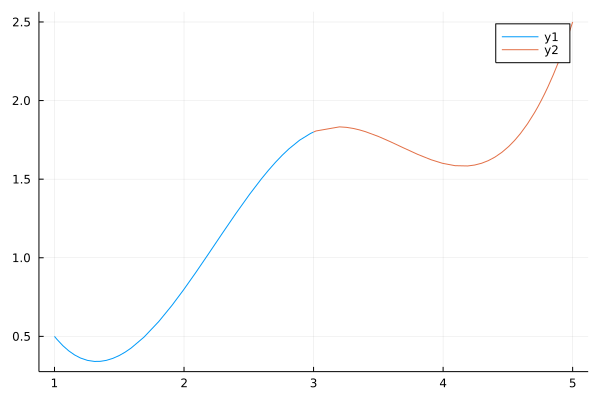

In [15]:
P(x) = c[1] + c[2] * x + c[3] * x^2 + c[4] * x^3
Q(x) = c[5] + c[6] * x + c[7] * x^2 + c[8] * x^3
plot(P, 1, 3)
plot!(Q, 3, 5)

In [2]:
a=2

2